# Time Series Forcasting
##  Forcasting Mumbai Market Onion Prices.
<p>Rohan Takey </p><br>

___

Dataset : Month Wise Market Arrival.<br>


___
Problem Statement : Indian Onion Market Time Series Analysis .
___

### Table Of Content :
* [Overview](#Overview)
* [Technical Aspect](#Technical-Aspect)
* [Data Handling](#Data-handling)
* [Monthly Price](#Monthly-price)
* [Data Decomposition](#Data-Decomposition)
* [ACF and PACF Plots](#ACF-and-PACF-Plots)
* [Arima Model](#Arima-Model)
* [Holtz Winter Method](#Holtz-Winter-Method)
* [Forcast](#Forcast)
* [Conclusion](#Conclusion)



### Overview

Time series data , that genralized by time as independant variable and the dpendant variable can be forcasted.An Time series model analyis the pattern over time to give forcasting for future. 

### Technical Aspect

* This Notebook contains Time Series analysis model.
* The Scripting Langauge is Python.
* Statsmodel library used for all the different function of time series modelling.


### Data Handling

In [67]:
# Data Handling :
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For getting parameters to smoothning data and making it stationary.
from statsmodels.tsa.stattools import pacf,acf,adfuller

# For getting components from data.
from statsmodels.tsa.seasonal import seasonal_decompose as decompose

#ARIMA Model
from statsmodels.tsa.arima_model import ARIMA 

# White noise detection-Hypothesis test for good or bad model
# Ljung box test
import statsmodels.api as sm
# error Calculation
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.api import SimpleExpSmoothing # For simple exponential smoothning
from statsmodels.tsa.holtwinters import ExponentialSmoothing # for double and triple exponential smoothning

# Setting Defaults :
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(20,8)

In [3]:
# Data Reading:
data=pd.read_csv('MonthWiseMarketArrivals_Clean.csv',index_col='date',parse_dates=True)


In [4]:
# Ssample Of data
data.sample(10)

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city
date,,,,,,,,,
2009-03-01,PIMPALGAON(MS),March,2009,390218,569,861,711,MS,PIMPALGAON
2013-02-01,JUNNAR(MS),February,2013,1570,500,1350,1000,MS,JUNNAR
2008-12-01,MAHUVA(GUJ),December,2008,46204,786,1104,942,GUJ,MAHUVA
2015-07-01,BHUBNESWER(OR),July,2015,26500,2342,2508,2458,OR,BHUBNESWER
2013-01-01,RAIPUR(CHGARH),January,2013,4770,1458,1639,1566,HR,RAIPUR
2013-12-01,LUDHIANA(PB),December,2013,1117,1000,2100,1550,PB,LUDHIANA
2015-01-01,KOPERGAON(MS),January,2015,3386,310,1507,1242,MS,KOPERGAON
2007-03-01,LUCKNOW,March,2007,3660,981,981,981,UP,LUCKNOW
2008-01-01,BHUBNESWER(OR),January,2008,43079,563,630,597,OR,BHUBNESWER


** Attributes Information**<br>
1. Market Name - Market Place Name<br>
2. Month - Month (January-December)<br>
3. Year - 1996-2016<br>
4. Quantity - Quantity of Onion (in Kgs)<br>
5. priceMin - Minimum Selling Price<br>
6. priceMax - Maximum Selling Price<br>
7. Pricemod - Modal Price<br>
8. State - State of market<br>
9. City - City of market<br>
10. Date - Date of arrival<br>


In [5]:
# Considering Only Mumbai Market Data :
mumbai = data.loc[data['market'].str.contains('MUMBAI', case=False, regex=False, na=False)]

In [7]:
mumbai.sample(10)

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city
date,,,,,,,,,
2010-09-01,MUMBAI,September,2010,229350,1233,1624,1390,MS,MUMBAI
2011-11-01,MUMBAI,November,2011,265000,856,1331,1089,MS,MUMBAI
2012-03-01,MUMBAI,March,2012,224000,405,563,484,MS,MUMBAI
2008-05-01,MUMBAI,May,2008,246050,323,465,404,MS,MUMBAI
2014-11-01,MUMBAI,November,2014,240700,1383,2258,1821,MS,MUMBAI
2009-11-01,MUMBAI,November,2009,231450,1408,2172,1790,MS,MUMBAI
2015-06-01,MUMBAI,June,2015,239210,1807,2180,2015,MS,MUMBAI
2011-02-01,MUMBAI,February,2011,246050,736,1260,988,MS,MUMBAI
2004-05-01,MUMBAI,May,2004,166430,357,466,405,MS,MUMBAI


In [9]:
# Data Checking for missing Values :
mumbai.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 146 entries, 2004-01-01 to 2015-12-01
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   market    146 non-null    object
 1   month     146 non-null    object
 2   year      146 non-null    int64 
 3   quantity  146 non-null    int64 
 4   priceMin  146 non-null    int64 
 5   priceMax  146 non-null    int64 
 6   priceMod  146 non-null    int64 
 7   state     146 non-null    object
 8   city      146 non-null    object
dtypes: int64(5), object(4)
memory usage: 11.4+ KB


* No null values found in data

In [20]:
# taking only relevent column for prediction
my_data=mumbai[['priceMod']]
my_data

,priceMod
date,
2004-01-01,849
2005-01-01,387
2006-01-01,402
2007-01-01,997
2008-01-01,448
...,...
2011-12-01,749
2012-12-01,1330
2013-12-01,1639


In [21]:
# sotring Index for date
my_data=my_data.sort_index()

In [22]:
# Checking for duplicate date in index.
print('Duplicate Entries (if any): ',sum(my_data.index.duplicated()))

Duplicate Entries (if any):  0


* no duplicate entry in date.

In [24]:
# sorted data
my_data

,priceMod
date,
2004-01-01,849
2004-02-01,736
2004-03-01,498
2004-04-01,397
2004-05-01,405
...,...
2015-10-01,3748
2015-11-01,2623
2015-12-01,1542


### Monthly price

In [40]:
# Monthly Price of onion.
monthly_price=pd.DataFrame(my_data.priceMod.resample('M').mean())
monthly_price

,priceMod
date,
2004-01-31,849
2004-02-29,736
2004-03-31,498
2004-04-30,397
2004-05-31,405
...,...
2015-10-31,3748
2015-11-30,2623
2015-12-31,1542


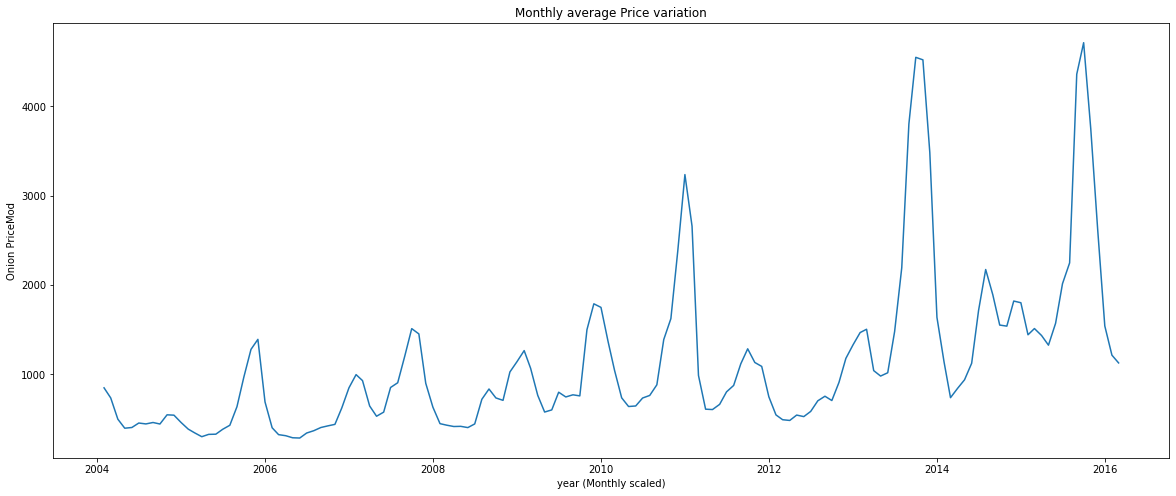

In [91]:
# Price Plot on monthly data
plt.plot(monthly_price.priceMod.resample('M').sum())
plt.title('Monthly average Price variation')
plt.xlabel('year (Monthly scaled)')
plt.ylabel('Onion PriceMod')
plt.show()



### Data Decomposition 

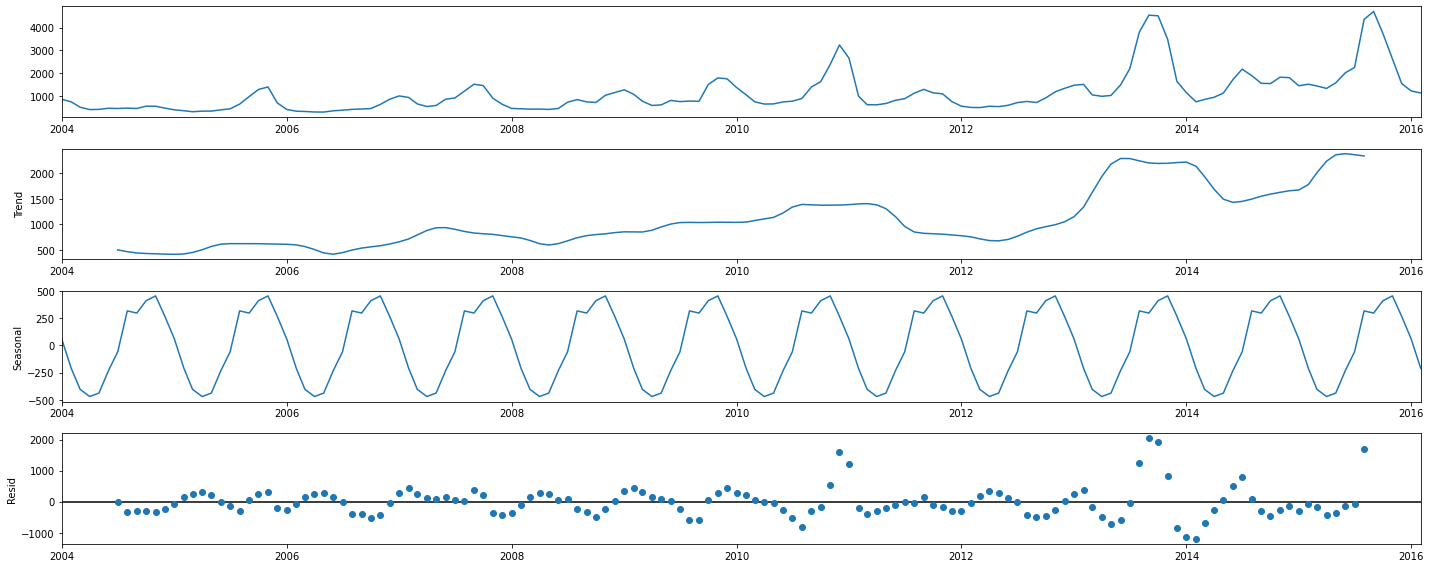

In [45]:
# finding components of data 
decomposition=decompose(my_data,period=12)
decomposition.plot();

* An Increasing Trend can be observed from plot.
* Seasonal data also present as per the plot.

In [46]:
# Check for data stationarity
# argumented dickey fuller test 
def check_stationarity(data):
    p_value=adfuller(data)[1]
    if p_value < 0.05:
        msg='data is stationary. P-value={:.3f} .build the model.'.format(p_value)
    else:
        msg='data is not stationary. P-Value={:.3f}. difference the data before creating model'.format(p_value)
    
    return (msg)

In [47]:
# Stationarity Check :
check_stationarity(my_data)

'data is stationary. P-value=0.000 .build the model.'

### ACF and PACF Plots

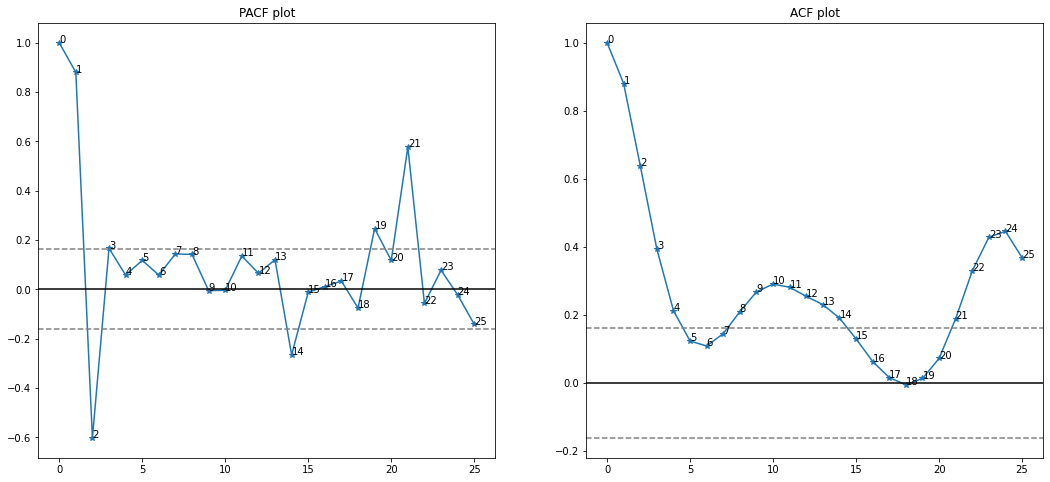

In [48]:
# plotting pacf and acf plots
lags=25  # Primary logs taken as random
pacf_lags=pacf(my_data,nlags=lags,method='ols')
acf_lags=acf(my_data,nlags=lags)
lag_coeff=np.arange(lags+1)

# Plots
# PACF Plot
plt.figure(figsize=(18,8))
plt.subplot(121)
ax1=plt.plot(pacf_lags,marker='*')
plt.axhline(y=0,lineStyle='-',color='black')
plt.axhline(y=-1.96/np.sqrt(len(my_data)),linestyle='--',color='gray')
plt.axhline(y= 1.96/np.sqrt(len(my_data)),linestyle='--',color='gray')
plt.title('PACF plot')
for a,b in zip(lag_coeff,pacf_lags):
    plt.text(a,b,str(a))

#PACF Plot
plt.subplot(122)
ax2=plt.plot(acf_lags,marker='*')
plt.axhline(y=0,lineStyle='-',color='black')
plt.axhline(y=(-1.96/(np.sqrt(len(my_data)))),linestyle='--',color='gray')
plt.axhline(y=(1.96/(np.sqrt(len(my_data)))),linestyle='--',color='gray')
plt.title('ACF plot')
for a,b in zip(lag_coeff,acf_lags):
    plt.text(a,b,str(a))

### Arima Model

In [50]:
# From plot of PACF and ACF we get different values of p and q
p_list=[2,13,18] # From PACF plot
q_list=[5]
d=0 # as data statinory no differencing needed.

# build the ARIMA model
for p in p_list:
    for q in q_list:
        m1=ARIMA(my_data,order=(p,d,q)).fit()
        # Check every model if its good or bad by Ljung-box test
        pvalue=sm.stats.acorr_ljungbox(m1.resid,1)[1] # 1 is lag and 1 location for p value as output
        
        if pvalue < 0.05:
            print('Bad Model.\nparameters are p={},q={}'.format(p,q))
        else:
            print('GOOD MODEL.\nparameters are p={},q={}'.format(p,q))
        
        print("p-Value={}\nAIC={}\nBIC={}\n".format(pvalue,m1.aic,m1.bic))


GOOD MODEL.
parameters are p=2,q=5
p-Value=[0.74877807]
AIC=2142.017395629201
BIC=2168.869855224576

GOOD MODEL.
parameters are p=13,q=5
p-Value=[0.89398209]
AIC=2155.17634025685
BIC=2214.8484726910165

GOOD MODEL.
parameters are p=18,q=5
p-Value=[0.86737645]
AIC=2116.451548878874
BIC=2191.041714421582



In [51]:
# creating  train data and test data for testing model accuracy 
print('shape of data is ',my_data.shape)
train_data=my_data.head(100)
test_data=my_data.tail(46)
print('shape of train data is ',train_data.shape)
print('shape of test data is ',test_data.shape)

shape of data is  (146, 1)
shape of train data is  (100, 1)
shape of test data is  (46, 1)


In [52]:
train_data.tail()

,priceMod
date,
2011-12-01,749
2012-01-01,546
2012-02-01,492
2012-03-01,484
2012-04-01,544


In [53]:
test_data.head()

,priceMod
date,
2012-05-01,527
2012-06-01,585
2012-07-01,704
2012-08-01,755
2012-09-01,707


**Data Divided in order so now prediction can be done** 

In [55]:
 # I took p=2 and q=5 when d=0 for model building as it has lowest AIC, BIC score
model1=ARIMA(train_data,order=(2,0,5)).fit()

In [56]:
# Forcasting data for next 46 entries
pred=model1.forecast(steps=46)
print(pred[0])

[ 674.86709374  818.11233716  935.3638512  1018.89567414 1031.80282489
  972.88334834  870.18435915  761.56344952  681.59060359  651.24656093
  673.24133347  733.64687454  808.48095792  872.52474647  907.33027194
  906.03822834  873.94044722  825.18866542  777.19481825  744.77640854
  735.90155635  750.13978512  779.93361116  813.91349218  840.94877838
  853.57561194  849.82052535  833.07015957  810.29229752  789.38460097
  776.59343811  774.79573369  783.06106044  797.45667236  812.67683114
  823.87823827  828.12305778  825.03408732  816.56513067  806.07782204
  797.10585163  792.23311421  792.41910534  796.92069488  803.75380503
  810.47832648]


In [63]:
# RMSE Of model :
mse=mean_squared_error(test_data.priceMod,pred[0])
print('RMSE Of model = {:.3f}'.format(np.sqrt(mse)))

RMSE Of model = 1486.704


In [64]:
# Smoothning techqnics:


# 1.moving average:
lags=5
moving_Avg_10=my_data.rolling(window=lags).mean()
print(moving_Avg_10)

            priceMod
date                
2004-01-01       NaN
2004-02-01       NaN
2004-03-01       NaN
2004-04-01       NaN
2004-05-01     577.0
...              ...
2015-10-01    3417.2
2015-11-01    3538.8
2015-12-01    3397.6
2016-01-01    2768.4
2016-02-01    2051.2

[146 rows x 1 columns]


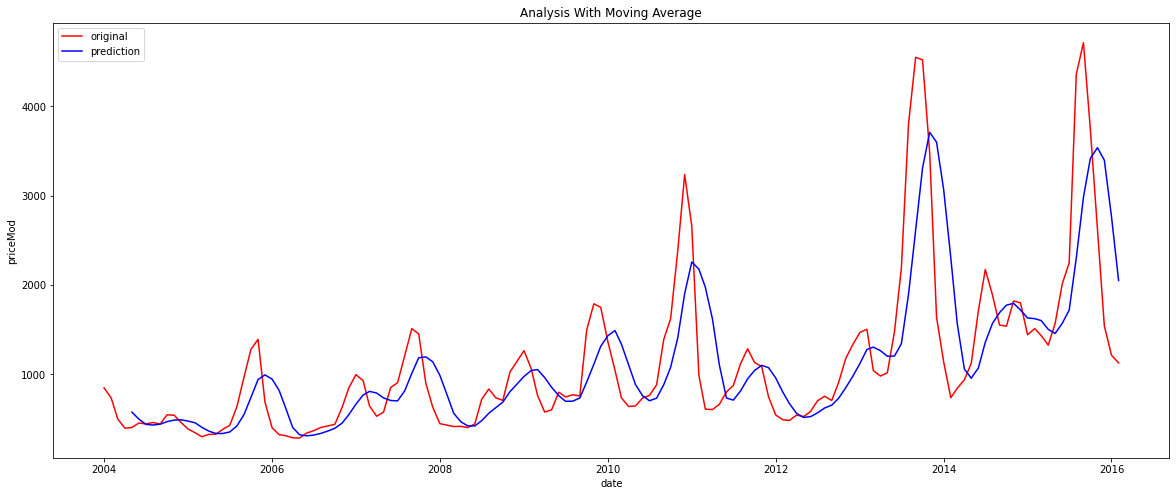

In [96]:
# Compairing actual vs moving average data 

sns.lineplot(my_data.index,my_data.priceMod,color='r',label='original')
sns.lineplot(my_data.index,moving_Avg_10.priceMod,color='b',label='prediction')
plt.title('Analysis With Moving Average')
plt.legend()

In [72]:
# 2. Exponential smoothning

# Simple smoothning: Need Alpha Value-
def simplesmoothning(data,alpha):
    model=SimpleExpSmoothing(data).fit(smoothing_level=alpha)
    pred=model.fittedvalues
    df=pd.DataFrame({'actual':my_data.priceMod,'prediction':pred})
    RMSE=np.sqrt(mean_squared_error(df.actual,df.prediction))
    print("RMSE from this alpha =",RMSE)
    print()
    return(model,df)

In [73]:
# Building model at diff. alpha:
exp_m1,df1=simplesmoothning(my_data,0.2)
print(df1)
f1=df1.prediction

RMSE from this alpha = 688.7429826357154

            actual   prediction
date                           
2004-01-01     849   577.192201
2004-02-01     736   631.553761
2004-03-01     498   652.443009
2004-04-01     397   621.554407
2004-05-01     405   576.643526
...            ...          ...
2015-10-01    3748  2767.888015
2015-11-01    2623  2963.910412
2015-12-01    1542  2895.728330
2016-01-01    1215  2624.982664
2016-02-01    1128  2342.986131

[146 rows x 2 columns]


In [74]:
exp_m2,df2=simplesmoothning(my_data,0.75)
f2=df2.prediction

RMSE from this alpha = 495.8129078392663



In [75]:
exp_m3,df3=simplesmoothning(my_data,1.4)
f3=df3.prediction

RMSE from this alpha = 369.54081883602356



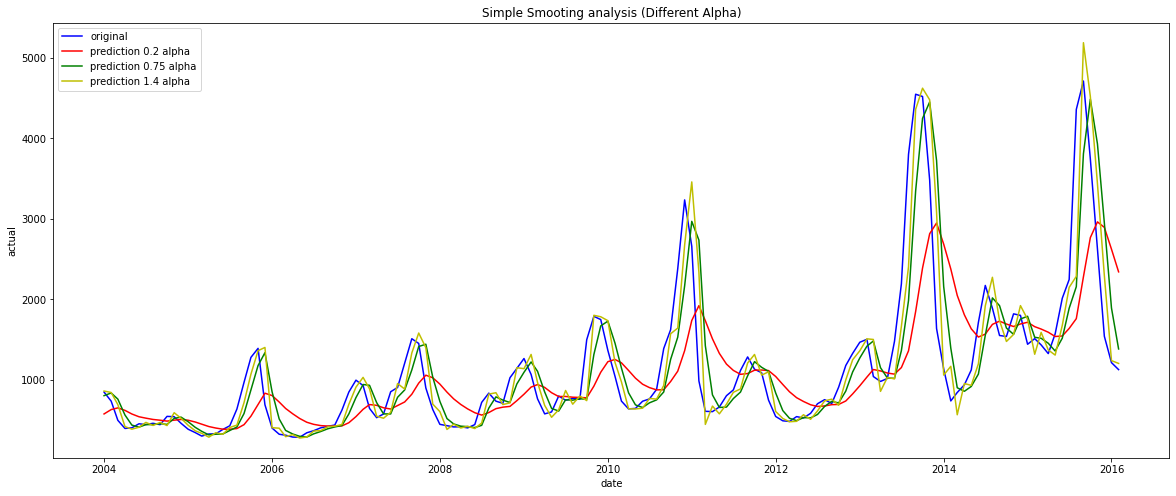

In [97]:
sns.lineplot(df1.index,df1.actual,color='b',label='original')
sns.lineplot(df1.index,df1.prediction,color='r',label='prediction 0.2 alpha')
sns.lineplot(df1.index,df2.prediction,color='g',label='prediction 0.75 alpha')
sns.lineplot(df1.index,df3.prediction,color='y',label='prediction 1.4 alpha')
plt.title('Simple Smooting analysis (Different Alpha)')
plt.show()

In [77]:
# forcasting using alpha 0.2
print(exp_m1.forecast(6))

2016-03-01    2099.988905
2016-04-01    2099.988905
2016-05-01    2099.988905
2016-06-01    2099.988905
2016-07-01    2099.988905
2016-08-01    2099.988905
Freq: MS, dtype: float64


In [78]:
# forcasting using alpha 0.75
print(exp_m2.forecast(6))

2016-03-01    1192.195418
2016-04-01    1192.195418
2016-05-01    1192.195418
2016-06-01    1192.195418
2016-07-01    1192.195418
2016-08-01    1192.195418
Freq: MS, dtype: float64


In [81]:
# forcasting using alpha 1.4
print(exp_m3.forecast(6))

2016-03-01    1097.196034
2016-04-01    1097.196034
2016-05-01    1097.196034
2016-06-01    1097.196034
2016-07-01    1097.196034
2016-08-01    1097.196034
Freq: MS, dtype: float64


* Simple smooting method gives low RMSE but results looks to be grouped.

### Holtz Winter Method

In [82]:
# double exponential smoothning:

# Holtz Method : Trend but no Seasonality.
#( Alpha And Beta Parametrs)
def doublesmoothing(data,alpha,beta,trend='additive'):
    model=ExponentialSmoothing(data,trend=trend).fit(smoothing_level=alpha,smoothing_slope=beta)
    pred=model.fittedvalues
    df=pd.DataFrame({'actual':my_data.priceMod,'prediction':pred})
    RMSE=np.sqrt(mean_squared_error(df.actual,df.prediction))
    print("RMSE from this alpha =",RMSE)
    return(model,df)

In [83]:
dexp_m4,df4=doublesmoothing(my_data,0.25,0.65)

RMSE from this alpha = 976.9728653786052


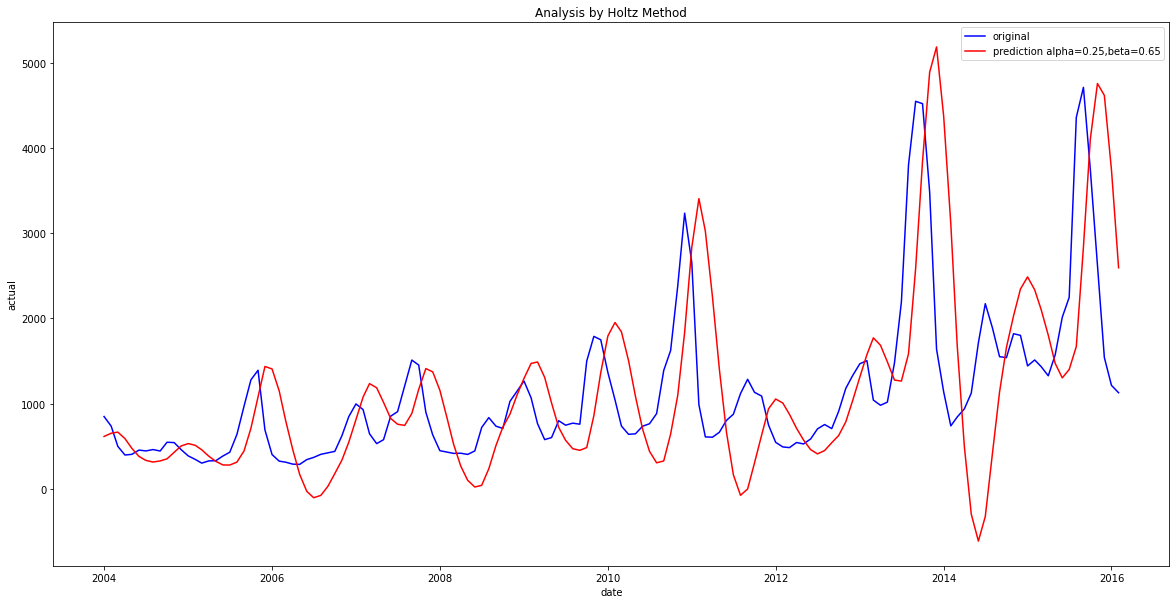

In [98]:
plt.figure(figsize=(20,10))
sns.lineplot(df4.index,df4.actual,color='b',label='original')
sns.lineplot(df4.index,df4.prediction,color='r',label='prediction alpha=0.25,beta=0.65')
plt.title('Analysis by Holtz Method')
plt.show()

In [86]:
# Forcast on double exponential smoothning - holtz method
dexp_m4.forecast(6)

2016-03-01    1473.349178
2016-04-01     718.184563
2016-05-01     -36.980051
2016-06-01    -792.144666
2016-07-01   -1547.309280
2016-08-01   -2302.473895
Freq: MS, dtype: float64

* Forcasting predicting negative values .
* No seasonality condition is voileted in here.
* Will move for Holtz - winter Triple smoothning for best results.

In [87]:
# Triple exponential smoothning


# Holtz Winter Method  : when data has trend and seasonality :
def triplesmoothing(data,trend='add',seasonal='add'):
    model=ExponentialSmoothing(data,trend=trend,seasonal=seasonal,seasonal_periods=12).fit()
    pred=model.fittedvalues
    df=pd.DataFrame({'actual':my_data.priceMod,'prediction':pred})
    RMSE=np.sqrt(mean_squared_error(df.actual,df.prediction))
    print("RMSE from this alpha =",RMSE)
    return(model,df)

In [88]:
texp_m5,df5=triplesmoothing(my_data.priceMod)

RMSE from this alpha = 435.31425418924937


Text(0.5, 1.0, 'Analysis by Holtz Winter Method')

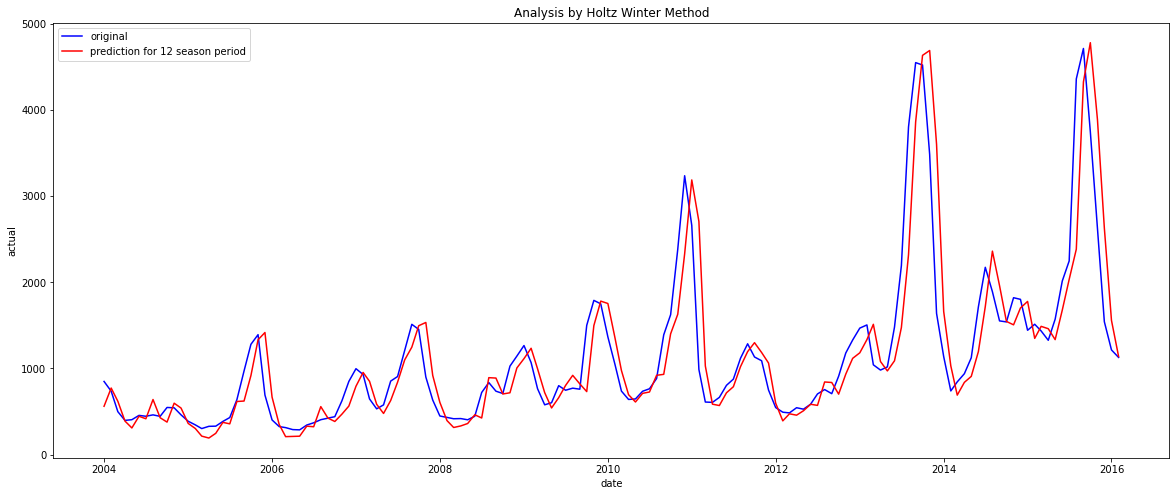

In [101]:
sns.lineplot(df5.index,df5.actual,color='b',label='original')
sns.lineplot(df5.index,df5.prediction,color='r',label='prediction for 12 season period')
plt.title('Analysis by Holtz Winter Method')

### Forcast

In [92]:
# Forcast for next 12 months
texp_m5.forecast(12)

2016-03-01    1075.390221
2016-04-01    1067.641830
2016-05-01    1073.045653
2016-06-01    1177.111518
2016-07-01    1174.748046
2016-08-01    1413.311407
2016-09-01    1302.232668
2016-10-01    1170.554651
2016-11-01    1125.347349
2016-12-01    1000.083715
2017-01-01     975.491618
2017-02-01     897.887297
Freq: MS, dtype: float64

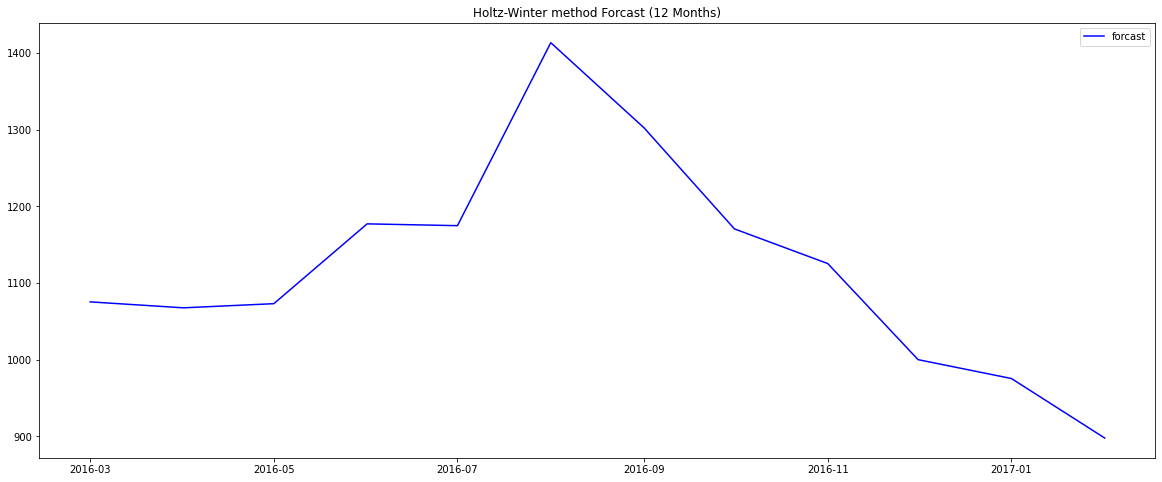

In [100]:
# Plot for next forcast
sns.lineplot(texp_m5.forecast(12).index,texp_m5.forecast(12).values,color='b',label='forcast')
plt.title('Holtz-Winter method Forcast (12 Months)')
plt.show()

### Conclusion


**As data contains seasonality and trend (by decomposition plot), triple smoothning methods like Holtz winter Method gives more close forcasting.**